In [25]:
# from bs4 import BeautifulSoup
import bs4 as bs
import pandas as pd
import glob
import pprint


def createUrl(url):
    '''
    Reconstructs the url for downloading the paper
    '''
    
    temp = ''
    for i in url[7:].split('/'):
        if i =='abs':
            temp+='/'+'pdf'
            continue
        temp+='/'+i
    temp+='.pdf'
    return url[:6]+temp
    



def DOI_extract(identifiers):
    '''
    Extract DOI reference from metadata
    '''
    if identifiers==[]:
        return float('nan')

    for link in identifiers:
        
        if link.text[:4] == 'doi:':
            return link.text[4:]
#             return link.text
    
    return float('nan')



def link_extract(identifiers):
    '''
    Extract link reference for pdf
    '''
    
    if identifiers==[]:
        return float('nan')

    for link in identifiers:

        if link.text[:5] == 'http:':
    #             return link.text[4:]
            #return link.text
            return createUrl(link.text)
    return float('nan')






def journal_extract(identifiers):
    '''
    Extract Journal reference from metadata
    '''
    if identifiers==[]:
        return float('nan')

    for link in identifiers:
        if link.text[:4] != 'doi:' and link.text[:5] != 'http:':
                return link.text
        

    return float('nan')





def fields_of_interest(soup, oneCategory=True):
    '''
    Gathers xml tags of interest from arxiv
    '''
    fields = []
    ident = soup.find_all('dc:identifier') #all the 'identifier' tags
    
    
    fields.append(DOI_extract(ident)) #DOI 
    
#     fields.append(link_extract(ident)) #link
    
#     fields.append(journal_extract(ident))
    
    try:
        fields.append(soup.find_all('dc:title')[0].text)
    except:
         fields.append(float('nan'))
    
#################### UNCOMMNENT FOR COLLECTING THE SUMMARY #######################    
#     try:
#         fields.append(soup.find_all('dc:description')[0].text)
#     except:
#          fields.append(float('nan'))
    
    
    if oneCategory:
        
        try:
            fields.append(soup.find_all('dc:subject')[0].text.split(' - ')[0])
        except:
            fields.append(float('nan'))
    else:

        try:
            fields.append(soup.find_all('dc:subject')[0].text)
        except:
             fields.append(float('nan'))
    
    return fields





# if __name__ == '__main__':
info = []
for name in glob.glob('Mathematics_arXiv\*'):

    soup = bs.BeautifulSoup(open(name), "lxml-xml")

#     pprint.pprint(fields_of_interest(soup))
    info.append(fields_of_interest(soup,False))

#df = pd.DataFrame(info,columns=['DOI', 'Journal', 'title','Abstract','Categories']) 
df2 = pd.DataFrame(info,columns=['DOI', 'title','Categories'])


In [26]:
df2.shape

(366734, 3)

In [27]:
df2.head(15)

,DOI,title,Categories
0,NaN,Sparsity-certifying Graph Decompositions,Mathematics - Combinatorics
1,NaN,A determinant of Stirling cycle numbers counts...,Mathematics - Combinatorics
2,NaN,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Mathematics - Classical Analysis and ODEs
3,NaN,"Partial cubes: structures, characterizations, ...",Mathematics - Combinatorics
4,NaN,Computing genus 2 Hilbert-Siegel modular forms...,Mathematics - Number Theory
5,NaN,Distribution of integral Fourier Coefficients ...,Mathematics - Number Theory
6,NaN,$p$-adic Limit of Weakly Holomorphic Modular F...,Mathematics - Number Theory
7,NaN,Iterated integral and the loop product,Mathematics - Classical Analysis and ODEs
8,NaN,Approximation for extinction probability of th...,Mathematics - Probability
9,NaN,Stochastic Lie group integrators,Mathematics - Numerical Analysis


In [4]:
df2.shape

(288436, 3)

In [8]:
import seaborn as sns
%matplotlib inline


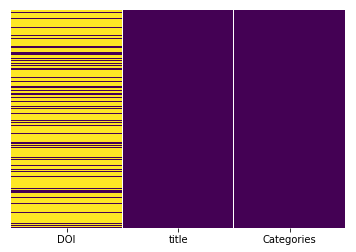

In [28]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
df2.dropna().shape

(84258, 3)

In [30]:
df4 = df2.dropna()
df4.to_csv("final_mathematics_366734.csv",index=False)

In [31]:
df2.to_csv("final_mathematics_288436.csv",index=False)

KeyboardInterrupt: 

In [11]:
df3=pd.read_csv('final.csv')

In [17]:
df3.dropna().shape

(603176, 3)

In [22]:
df3.columns

Index(['DOI', 'title', 'Categories'], dtype='object')

In [24]:
df3[['DOI','Categories']].dropna().to_csv('physics_DOI.csv',index=False)

In [18]:
df3.head(2)

,DOI,title,Categories
0,10.1103/PhysRevD.76.013009,Calculation of prompt diphoton production cros...,High Energy Physics - Phenomenology
1,NaN,The evolution of the Earth-Moon system based o...,Physics - General Physics


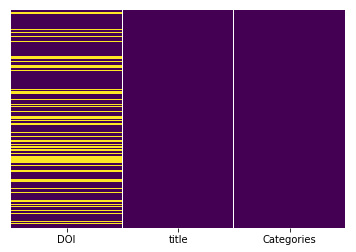

In [12]:
sns.heatmap(df3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df3=pd.read_csv("final_mathematics_288436.csv")

In [7]:
df3.head()

,DOI,title,Categories
0,NaN,Sparsity-certifying Graph Decompositions,Mathematics - Combinatorics
1,NaN,A determinant of Stirling cycle numbers counts...,Mathematics - Combinatorics
2,NaN,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Mathematics - Classical Analysis and ODEs
3,NaN,"Partial cubes: structures, characterizations, ...",Mathematics - Combinatorics
4,NaN,Computing genus 2 Hilbert-Siegel modular forms...,Mathematics - Number Theory


In [52]:
from requests.exceptions import ConnectionError
import requests

def download_pdf(url):
    '''Takes as an input a list of urls and downloads the papers.'''
    try:
        response = requests.get(url)
    except ConnectionError:
        print ('Failed to open url.')
        return
    response = requests.get(url, stream=True)
    path = 'tmp/'+ url.split('/')[-1]
    with open(path, 'wb') as f:
        f.write(response.content)
        return

In [53]:
for url in list(df2['url']):
    download_pdf(url)
    

In [9]:
df.to_csv('arxiv_DOI.csv',index=False)

In [8]:
df.shape

(898659, 4)

In [10]:
df.head()

,DOI,Journal,title,Categories
0,doi:10.1103/PhysRevD.76.013009,"Phys.Rev.D76:013009,2007",Calculation of prompt diphoton production cros...,High Energy Physics - Phenomenology
1,NaN,NaN,Sparsity-certifying Graph Decompositions,Mathematics - Combinatorics
2,NaN,NaN,The evolution of the Earth-Moon system based o...,Physics - General Physics
3,NaN,NaN,A determinant of Stirling cycle numbers counts...,Mathematics - Combinatorics
4,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Mathematics - Classical Analysis and ODEs


In [1]:
from bs4 import BeautifulSoup

In [12]:
text = 'High Energy Physics - Phenomenology'
text.split(' - ')[0]

'High Energy Physics'

In [9]:
file = 'oai%3AarXiv.org%3A0704.0001.oai_dc.xml'

In [10]:
infile = open(file,"r")
contents = infile.read()

In [61]:
from bs4 import BeautifulSoup
import pandas as pd
import glob
import pprint

In [ ]:
def DOI_extract(identifiers):
    '''Extract DOI reference from metadata'''
    if identifiers==[]:
        return

    for link in identifiers:
        
        if link.text[:4] == 'doi:':
#             return link.text[4:]
            return link.text
    
    return float('nan')

In [83]:
def journal_extract(identifiers):
    '''Extract Journal reference from metadata'''
    if identifiers==[]:
        return float('nan')

    for link in identifiers:
        if link.text[:4] != 'doi:' and link.text[:5] != 'http:':
                return link.text
        

    return float('nan')

In [84]:
def fields_of_interest(soup):
    '''Gathers xml tags of interest from arxiv'''
    fields = []
    ident = soup.find_all('dc:identifier')
    fields.append(DOI_extract(ident))
    fields.append(journal_extract(ident))
    
    try:
        fields.append(soup.find_all('dc:title')[0].text)
    except:
         fields.append(float('nan'))
    
    
#     try:
#         fields.append(soup.find_all('dc:description')[0].text)
#     except:
#          fields.append(float('nan'))
    
    try:
        fields.append(soup.find_all('dc:subject')[0].text)
    except:
         fields.append(float('nan'))
    
    return fields

In [96]:
import pprint
info = []
for name in glob.glob('data\*'):
    
    soup = bs.BeautifulSoup(open(name), "lxml-xml")

#     pprint.pprint(fields_of_interest(soup))
    info.append(fields_of_interest(soup))

# df = pd.DataFrame(info,columns=['DOI', 'Journal', 'title','Abstract','Categories']) 
df = pd.DataFrame(info,columns=['DOI', 'Journal', 'title','Categories'])
df.to_csv('test.csv',index=False)

In [94]:
df

,DOI,Journal,title,Abstract,Categories
0,doi:10.1103/PhysRevD.76.013009,"Phys.Rev.D76:013009,2007",Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,High Energy Physics - Phenomenology
1,NaN,NaN,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",Mathematics - Combinatorics
2,NaN,NaN,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,Physics - General Physics
3,NaN,NaN,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,Mathematics - Combinatorics
4,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,Mathematics - Classical Analysis and ODEs
5,doi:10.1103/PhysRevA.75.043613,NaN,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,Condensed Matter - Mesoscale and Nanoscale Phy...
6,doi:10.1103/PhysRevD.76.044016,"Phys.Rev.D76:044016,2007",Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,General Relativity and Quantum Cosmology
7,doi:10.1063/1.2975338,"Journal of Applied Physics, vol 104, 073536 (2...",Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,Condensed Matter - Materials Science
8,doi:10.1086/518646,"Astrophys.J.663:1149-1173,2007","The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,Astrophysics
9,NaN,NaN,"Partial cubes: structures, characterizations, ...",Partial cubes are isometric subgraphs of hyp...,Mathematics - Combinatorics


In [86]:
import pandas as pd


df = pd.DataFrame(columns=['DOI', 'Journal', 'title','Abstract','Categories']) 



In [88]:
df.append(['a','s','t','as','fd'],index=0)

TypeError: append() got an unexpected keyword argument 'index'

In [35]:
import bs4 as bs

soup = bs.BeautifulSoup(open(file), "lxml-xml")

In [36]:
soup.attrs()

TypeError: 'dict' object is not callable

In [37]:
soup.get_text()

'\nCalculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies\nBalázs, C.\nBerger, E. L.\nNadolsky, P. M.\nYuan, C. -P.\nHigh Energy Physics - Phenomenology\n  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of

In [72]:
fields_of_interest(soup)

['10.1103/PhysRevD.76.013009',
 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD pr

In [ ]:
soup.find_all('dc:identifier')

In [60]:
DOI_extract(soup.find_all('dc:identifier'))

'10.1103/PhysRevD.76.013009'

In [55]:
 soup.find_all('dc:title')[0].text

'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies'

In [56]:
 soup.find_all('dc:description')[0].text

'  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n'

In [38]:
 soup.find_all('dc:identifier')

[<dc:identifier>http://arxiv.org/abs/0704.0001</dc:identifier>,
 <dc:identifier>Phys.Rev.D76:013009,2007</dc:identifier>,
 <dc:identifier>doi:10.1103/PhysRevD.76.013009</dc:identifier>]

In [ ]:
if 

In [68]:
soup.find_all('dc:subject')[0].text

'High Energy Physics - Phenomenology'

In [45]:
import re

In [46]:
example = 'doi:10.1103/PhysRevD.76.013009'



In [48]:
match = re.search(r'doi:', example)
match.group()

'doi:'

In [ ]:
from requests.exceptions import ConnectionError
import requests

def download_pdf(url):
    
    try:
        response = requests.get(url)
    except ConnectionError:
        print 'Failed to open url.'
        return
    response = requests.get(url, stream=True)
    path = 'tmp/'+ url.split('/')[-1]
    with open(path, 'wb') as f:
        f.write(response.content)
        return

In [18]:
import requests
url = 'https://arxiv.org/pdf/0704.0001.pdf'
# url = 'http://arxiv.org/abs/0704.0001'
response = requests.get(url, stream=True)

with open('tmp/metadata.pdf', 'wb') as f:
    f.write(response.content)

In [50]:
url = 'https://arxiv.org/pdf/0704.0001.pdf'
url.split('/')[-1]

'0704.0001.pdf'

In [33]:
url = 'http://arxiv.org/abs/0704.0001'
a = url[7:].split('/')
print(a)

['arxiv.org', 'abs', '0704.0001']


In [41]:
temp = ''
for i in url[7:].split('/'):
    if i =='abs':
        temp+='/'+'pdf'
        continue
    temp+='/'+i
temp+='.pdf'
print(url[:6]+temp)

http://arxiv.org/pdf/0704.0001.pdf


In [40]:
url[:6]+temp

'http://arxiv.org/pdf/0704.0001.pdf'

In [42]:
def createUrl(url):
    temp = ''
    for i in url[7:].split('/'):
        if i =='abs':
            temp+='/'+'pdf'
            continue
        temp+='/'+i
    temp+='.pdf'
    return url[:6]+temp
createUrl(url)    

'http://arxiv.org/pdf/0704.0001.pdf'

In [ ]:
url.split('/')[-1]